# 1. Importowanie modułów oraz ich konfiguracja

## 1.1 Importowanie modułów

In [1]:
# Moduły związane z danymi
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Moduły do wizualizacji i wykresów
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit - wybrane modele uczenia maszynowego
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Scikit - selekcja oraz standaryzacja
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Moduł do zapisu obiektów w postaci plików
from joblib import dump, load

# Utworzony przeze mnie moduł zawierający dodatkowe funkcje
from modules.toolset import *
from modules.prediction_app import Application

%matplotlib inline

## 1.2 Konfiguracja modułów

In [2]:
# Wyłączenie wyświetlania ostrzeżeń
import warnings
warnings.filterwarnings('ignore')

# Konfiguracja modułu pandas
pd.set_option("display.min_rows", 1)
pd.set_option("display.max_rows", 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2. Wczytanie oraz przetworzenie danych

## 2.1 Wczytanie zbioru danych

In [3]:
# Wczytanie danych do ramki z pliku csv
houses_df = pd.read_csv('dataset/kc_house_data.csv', encoding='utf-8')
display(houses_df)
houses_df.drop(columns='id', inplace=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890.00,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,7,1715.00,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060.00,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050.00,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,7,1890.00,0,2003,0,98038,47.37,-122.03,2390,7570


## 2.2 Przetworzenie oraz analiza zbioru danych

### 2.2.1 Wstępne badanie zbioru danych

In [4]:
# Badanie dotyczące ilości rekordów, kolumn, ich typów oraz brakujących wartości
houses_df.info()

# Badanie statystyczne średniej wartości, odchylenia standardowego, kwartyli oraz minimalnych i maksymalnych wartości kolumn
houses_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### 2.2.1 Przetworzenie dat

In [5]:
# Wyekstrahowanie roku z daty ogłoszenia
houses_df['date'] = houses_df['date'].apply(lambda date: date[:4]).astype(int)

# Określnie wieku nieruchomości (rok renowacji w uproszczeniu będzie uznany za rok budowy, jeżeli spełnia odpowiednie warunki)
houses_df['age'] = houses_df.apply(lambda x: x['date'] - x['yr_renovated'] if (x['yr_renovated'] != 0) & (x['yr_renovated'] > x['yr_built']) else x['date'] - x['yr_built'], axis=1)

# Usunięcie nieprawidłowych rekordów w których wiek nieruchomości jest mniejszy od zera
houses_df.drop(houses_df[houses_df['age'] < 0].index, inplace=True)

# Usunięcie zbędnych kolumn
houses_df.drop(columns=['date', 'yr_built', 'yr_renovated'], inplace=True)

### 2.2.2 Zmiana typów danych na odpowiednie oraz konwersja jednostek z systemu imperialnego na metryczny

In [6]:
# Zmiana typów
for colname in ['bathrooms', 'floors', 'age']:
    houses_df[colname] = houses_df[colname].apply(lambda val: int(round(val)))


# Zmiana jednostek i nazw kolumn (sqft na m2)
for colname in ['sqft_lot', 'sqft_basement', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot15']:
    houses_df[colname] = houses_df[colname].apply(lambda val: val / 10.764)
    houses_df.rename(columns={colname: colname.replace('sqft', 'm2')}, inplace=True)

# Zmiana numerycznej wartości kodu pocztowego (zipcode) na ciągi znaków, aby
# zakodować je w późniejszym czasie oraz potraktować jako etykiety.
houses_df['zipcode'] = houses_df['zipcode'].apply(lambda x: str(x))

### 2.2.3 Usunięcie cech za bardzo skorelowanych z innymi

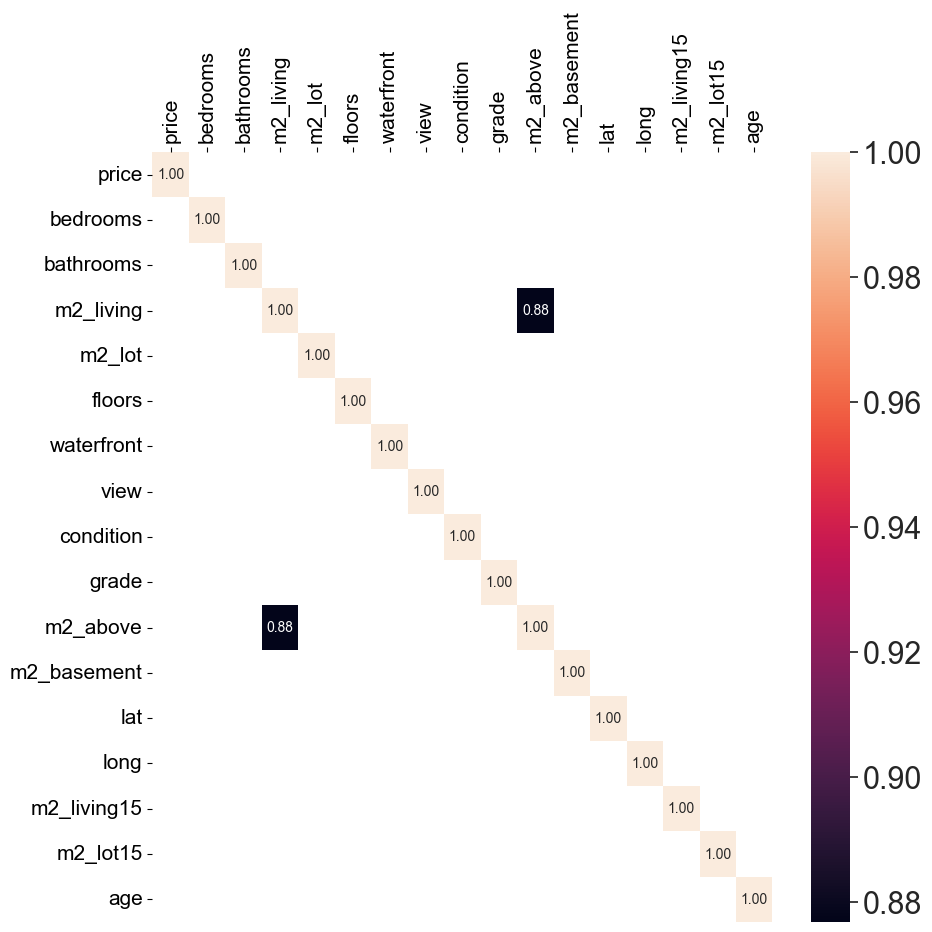

In [7]:
# Wykrycie wzajemnych korelacji pomiędzy cechami (>0.80)
plot_heatmap(houses_df, 0.80, 15, 10)

In [8]:
# Usunięcie powierzchni nad poziomem ziemi z powodu wysokiej korelacji (>0.8) z powierzchnią mieszkalną
houses_df.drop(columns='m2_above', inplace=True)

### 2.2.4 Przeanalizowanie rozkładów oraz usunięcie rekordów z odstającymi wartościami (ang. outliers)

In [9]:
# Ustawienie globalne - metoda usuwania wartości odstających

#method = 'interquartile'
method = 'zscore'

#### 2.2.4.1 Cena

Dolna granica: -561610.6528049753
Górna granica: 1641815.4411356072


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00,21189.00
mean,506831.50,3.35,2.03,188.75,1378.76,1.53,0.00,0.21,3.41,7.60,26.06,47.56,-122.21,182.12,1174.88,41.15
std,259386.91,0.92,0.72,77.73,3755.65,0.55,0.07,0.71,0.65,1.11,39.49,0.14,0.14,60.89,2530.18,28.73
min,75000.00,0.00,0.00,26.94,48.31,1.00,0.00,0.00,1.00,1.00,0.00,47.16,-122.52,37.07,60.48,0.00
25%,320000.00,3.00,2.00,130.99,465.25,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,137.50,471.94,16.00
50%,446500.00,3.00,2.00,175.59,702.34,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.23,169.08,704.11,37.00
75%,627500.00,4.00,2.00,232.26,975.01,2.00,0.00,0.00,4.00,8.00,50.17,47.68,-122.12,216.46,929.02,60.00
max,1640000.00,33.00,8.00,694.91,153414.99,4.00,1.00,4.00,5.00,12.00,264.77,47.78,-121.31,537.90,80936.45,115.00


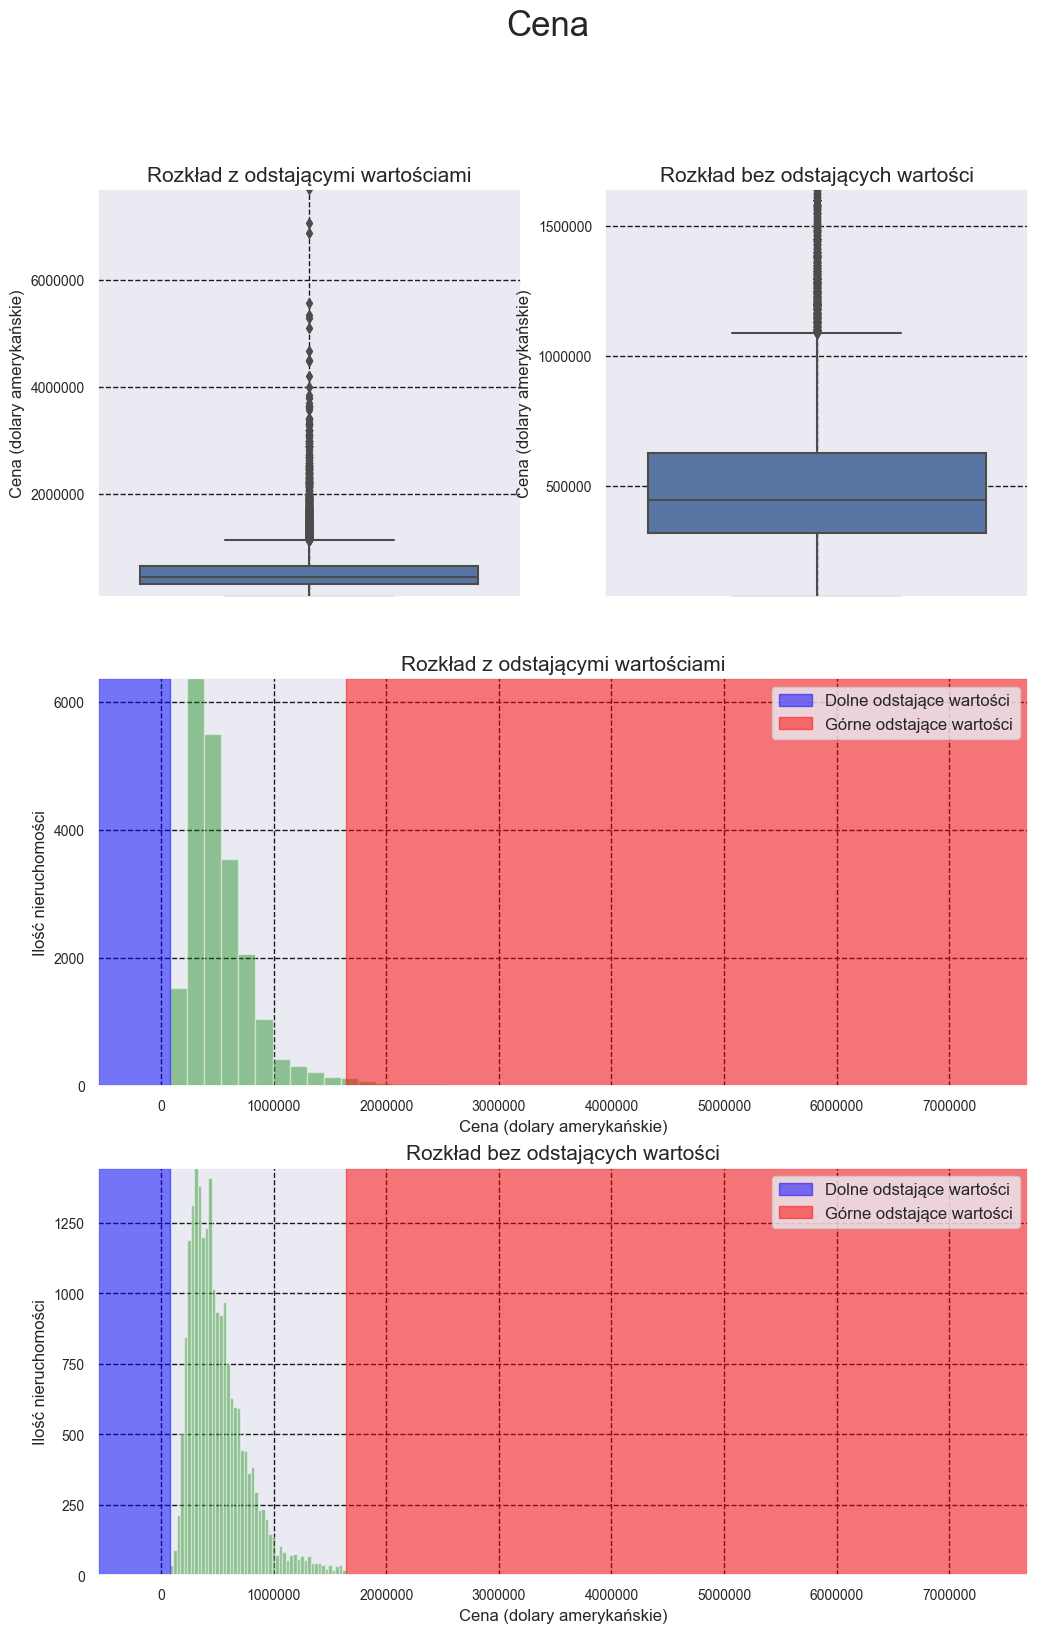

In [10]:
title = 'Cena'
labels_box = ('Cena (dolary amerykańskie)', None)
labels_dist = ('Ilość nieruchomości', 'Cena (dolary amerykańskie)')
column = 'price'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.2 Sypialnie

Dolna granica: 0.5904318387478535
Górna granica: 6.116633147801771


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00
mean,506465.21,3.34,2.03,188.44,1379.19,1.53,0.00,0.21,3.41,7.60,25.96,47.56,-122.21,182.10,1175.08,41.13
std,259167.74,0.87,0.71,77.37,3758.92,0.55,0.07,0.71,0.65,1.11,39.35,0.14,0.14,60.88,2530.02,28.72
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.52,37.07,60.48,0.00
25%,320000.00,3.00,2.00,130.99,465.35,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,137.50,472.73,16.00
50%,445894.00,3.00,2.00,175.59,702.34,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.23,169.08,704.48,37.00
75%,626200.00,4.00,2.00,232.26,974.66,2.00,0.00,0.00,4.00,8.00,50.17,47.68,-122.12,216.46,929.02,60.00
max,1640000.00,6.00,6.00,682.83,153414.99,4.00,1.00,4.00,5.00,12.00,264.77,47.78,-121.31,537.90,80936.45,115.00


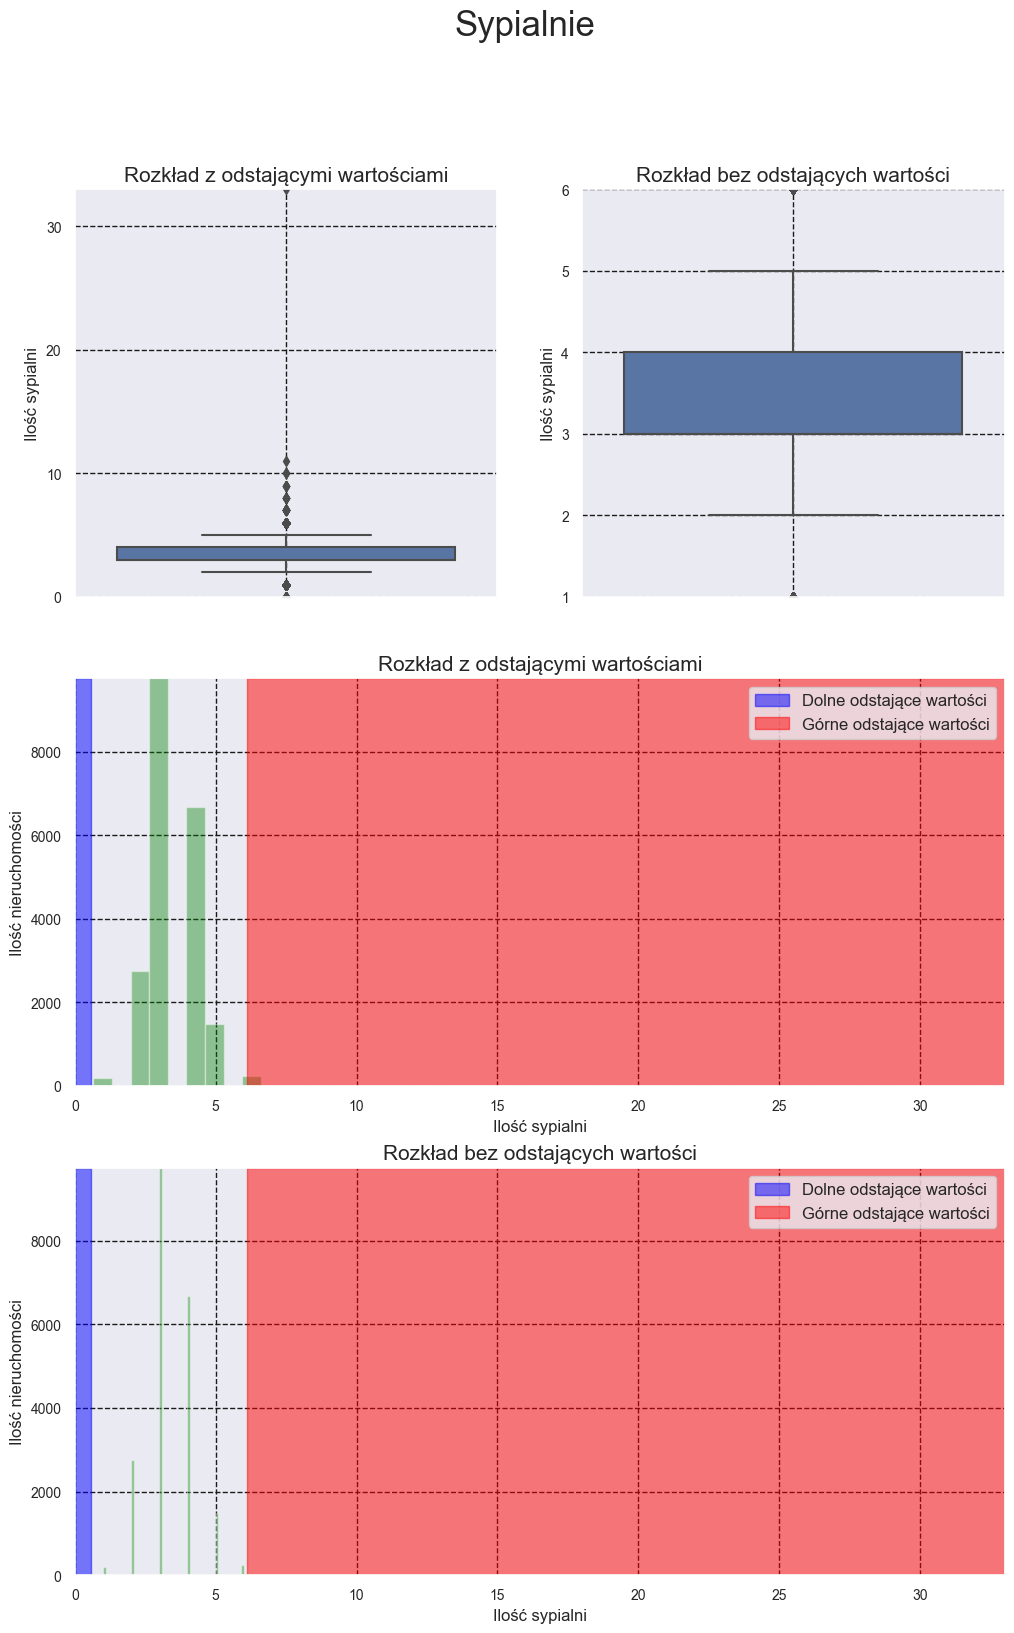

In [11]:
title = 'Sypialnie'
labels_box = ('Ilość sypialni', None)
labels_dist = ('Ilość nieruchomości', 'Ilość sypialni')
column = 'bedrooms'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.3 Łazienki

Dolna granica: -0.10668431794295952
Górna granica: 4.159988616371288


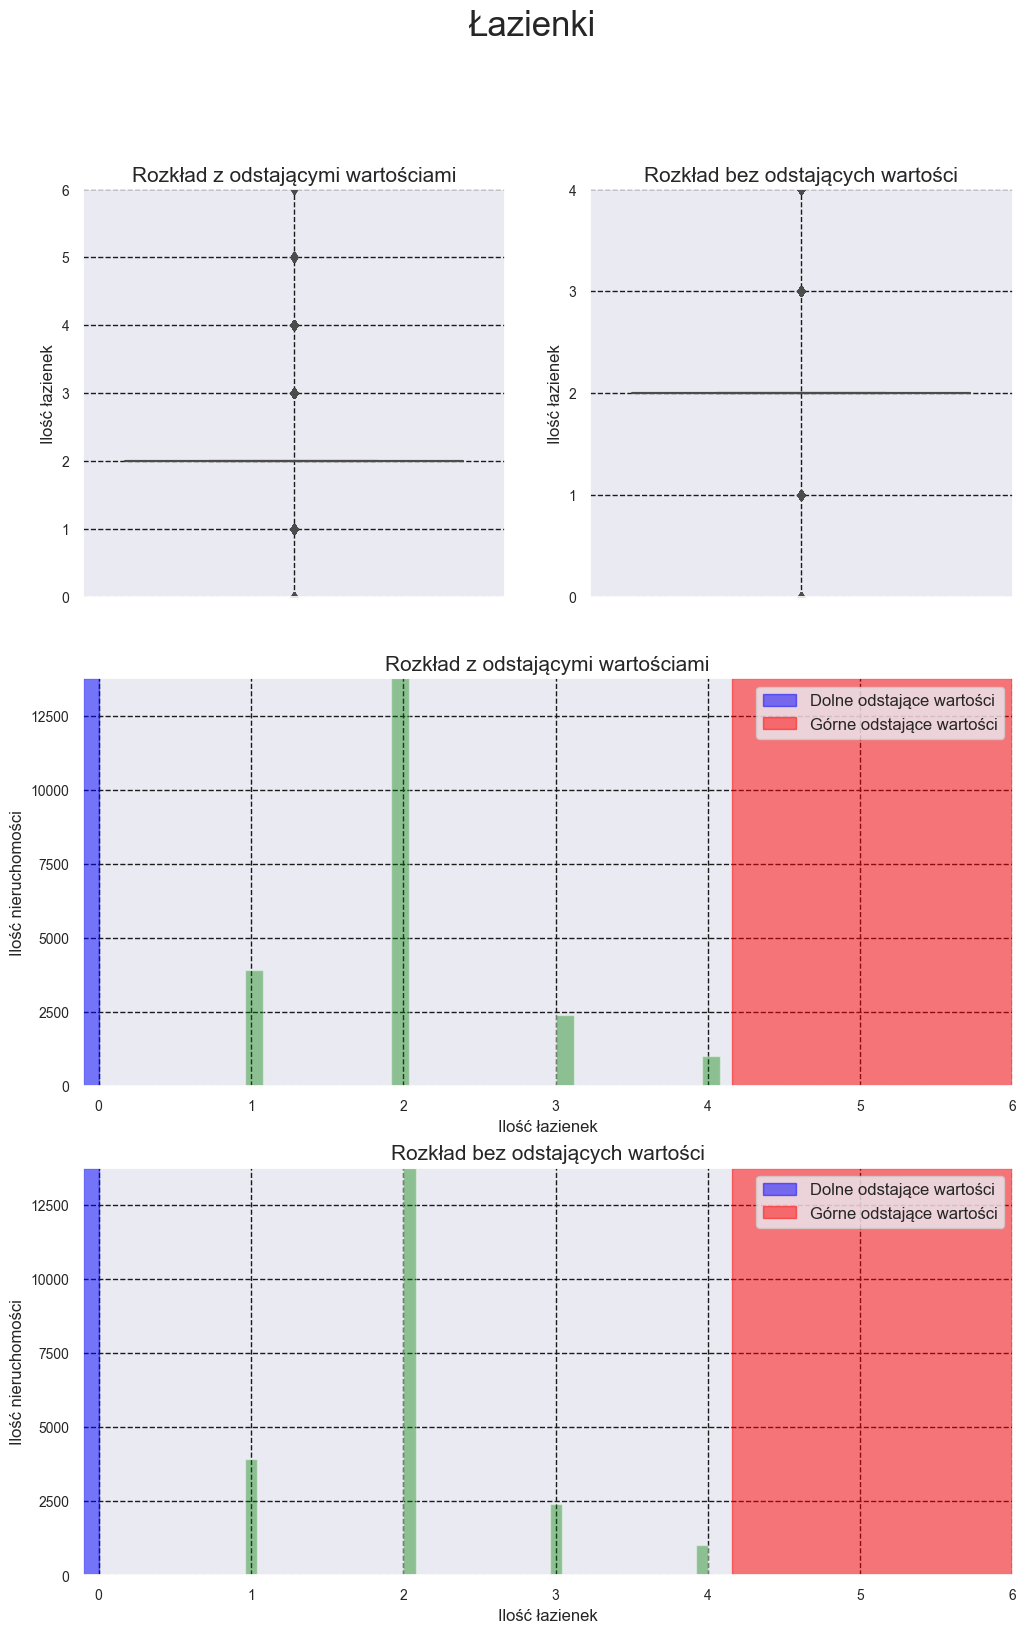

In [12]:
title = 'Łazienki'
labels_box = ('Ilość łazienek', None)
labels_dist = ('Ilość nieruchomości', 'Ilość łazienek')
column = 'bathrooms'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)

#### 2.2.4.4 Powierzchnia mieszkalna

Dolna granica: -41.96019767641664
Górna granica: 418.12739057640215


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00,20918.00
mean,500373.34,3.33,2.01,185.67,1338.68,1.52,0.00,0.20,3.41,7.58,25.37,47.56,-122.21,180.63,1142.38,41.35
std,251180.04,0.86,0.69,72.22,3619.95,0.55,0.07,0.69,0.65,1.08,38.28,0.14,0.14,58.73,2351.32,28.74
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.52,37.07,60.48,0.00
25%,319000.00,3.00,2.00,130.99,464.51,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,137.50,470.46,16.00
50%,443000.00,3.00,2.00,174.66,698.25,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.23,169.08,702.34,37.00
75%,621409.50,4.00,2.00,230.40,963.40,2.00,0.00,0.00,4.00,8.00,49.24,47.68,-122.12,214.60,921.40,60.00
max,1640000.00,6.00,4.00,418.06,153414.99,4.00,1.00,4.00,5.00,12.00,206.24,47.78,-121.31,537.90,52082.59,115.00


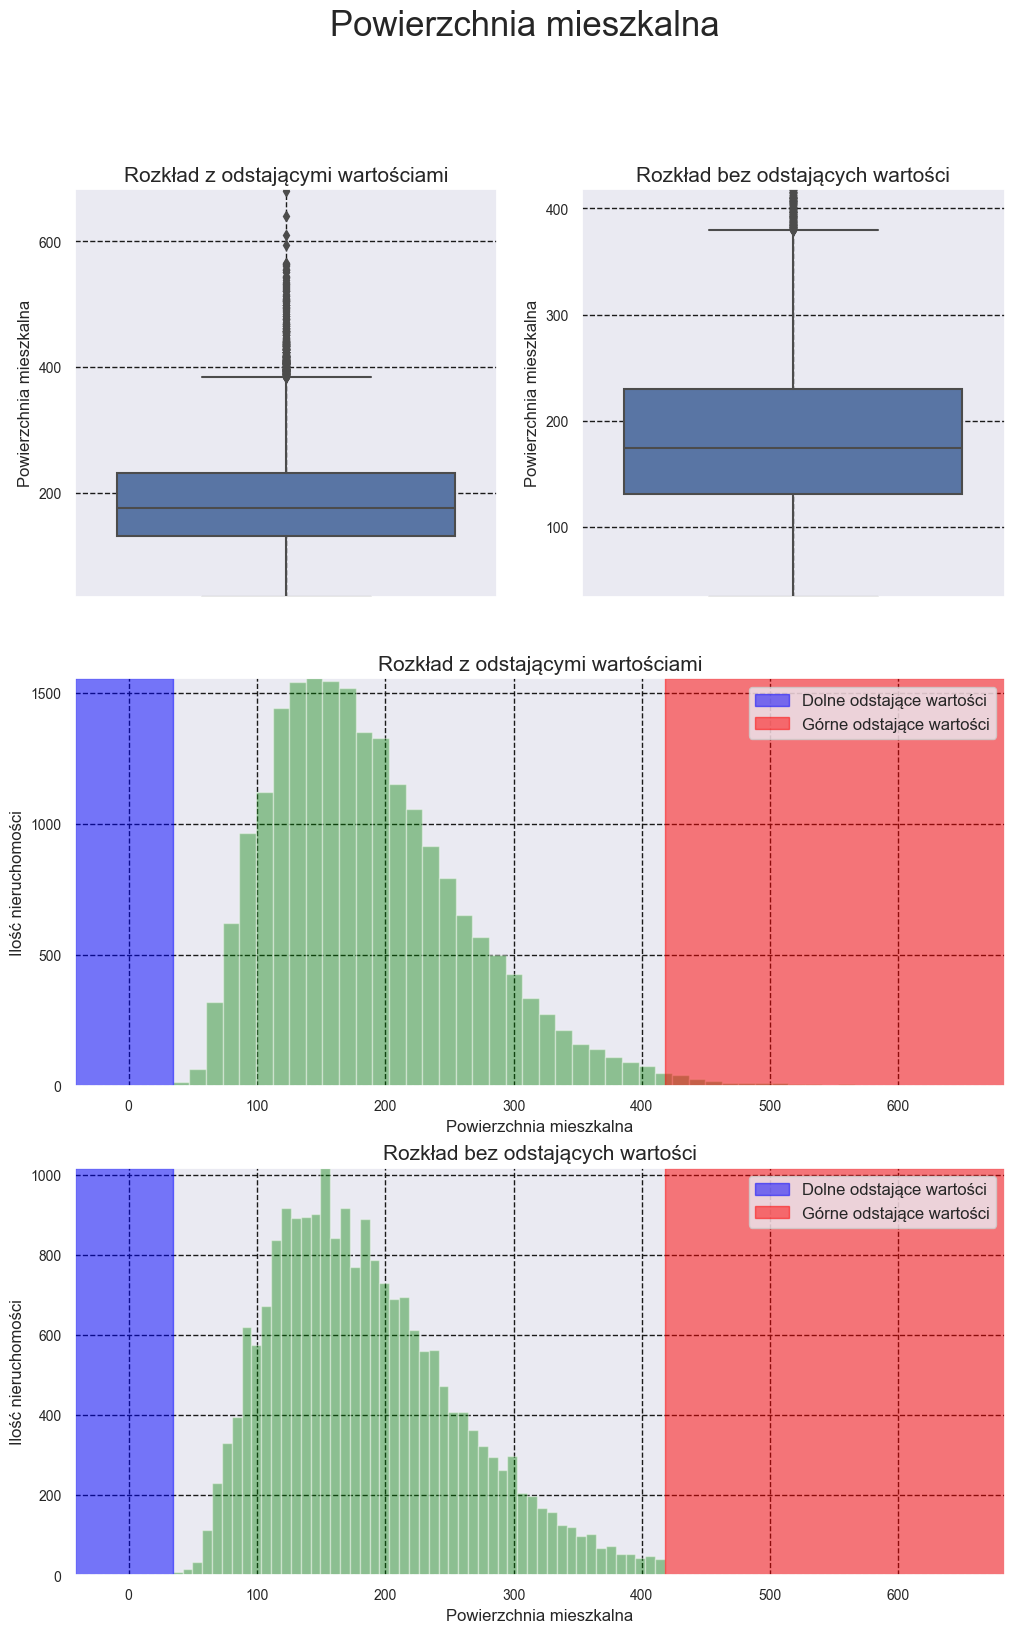

In [13]:
title = 'Powierzchnia mieszkalna'
labels_box = ('Powierzchnia mieszkalna', None)
labels_dist = ('Ilość nieruchomości', 'Powierzchnia mieszkalna')
column = 'm2_living'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.5 Powierzchnia działki

Dolna granica: -2660.6388997057047
Górna granica: 4622.689467450403


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00
mean,497167.91,3.33,2.00,183.75,833.12,1.52,0.00,0.19,3.41,7.56,25.43,47.56,-122.22,179.05,824.00,41.68
std,251753.53,0.86,0.68,71.14,688.32,0.55,0.06,0.68,0.65,1.06,38.10,0.14,0.14,58.17,880.26,28.99
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,37.07,60.48,0.00
25%,315000.00,3.00,2.00,130.06,464.51,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,136.57,464.51,16.00
50%,440000.00,3.00,2.00,172.80,684.36,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.25,167.22,692.12,38.00
75%,616562.50,4.00,2.00,226.68,920.78,2.00,0.00,0.00,4.00,8.00,49.24,47.68,-122.14,211.82,892.91,61.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,206.24,47.78,-121.31,537.90,31149.11,115.00


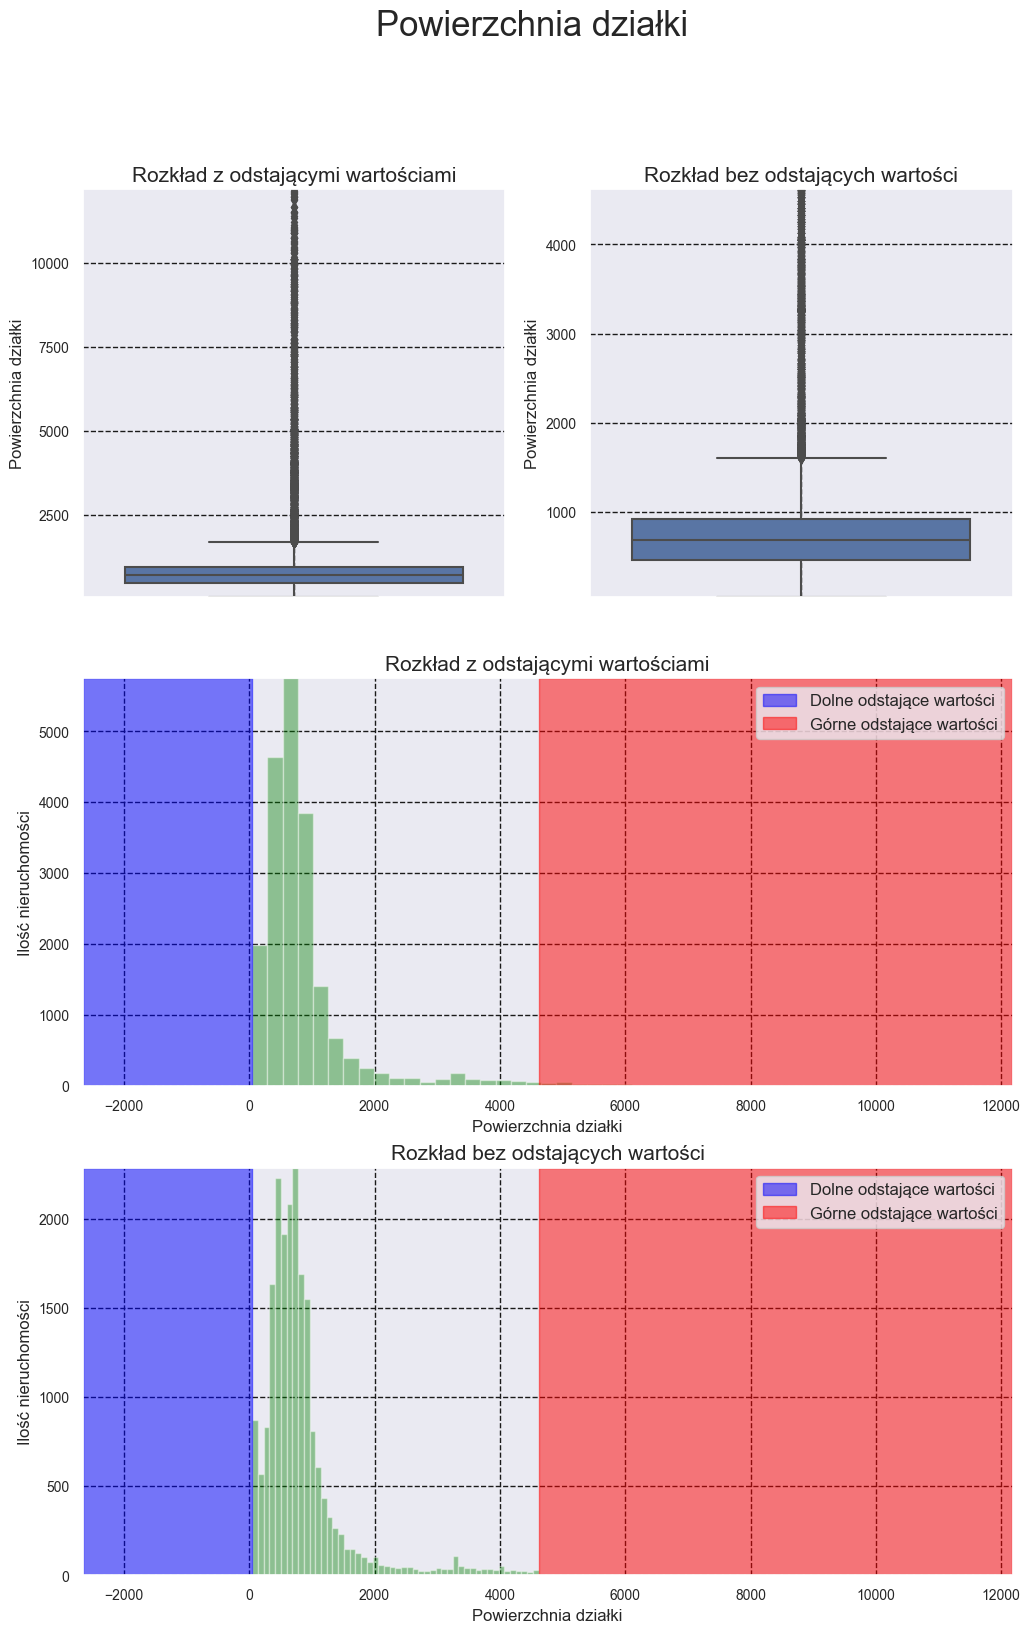

In [16]:
title = 'Powierzchnia działki'
labels_box = ('Powierzchnia działki', None)
labels_dist = ('Ilość nieruchomości', 'Powierzchnia działki')
column = 'm2_lot'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.6 Ilość pięter

Dolna granica: -0.1421934314652027
Górna granica: 3.1865538850160284


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00,20108.00
mean,497167.91,3.33,2.00,183.75,833.12,1.52,0.00,0.19,3.41,7.56,25.43,47.56,-122.22,179.05,824.00,41.68
std,251753.53,0.86,0.68,71.14,688.32,0.55,0.06,0.68,0.65,1.06,38.10,0.14,0.14,58.17,880.26,28.99
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,37.07,60.48,0.00
25%,315000.00,3.00,2.00,130.06,464.51,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,136.57,464.51,16.00
50%,440000.00,3.00,2.00,172.80,684.36,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.25,167.22,692.12,38.00
75%,616562.50,4.00,2.00,226.68,920.78,2.00,0.00,0.00,4.00,8.00,49.24,47.68,-122.14,211.82,892.91,61.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,206.24,47.78,-121.31,537.90,31149.11,115.00


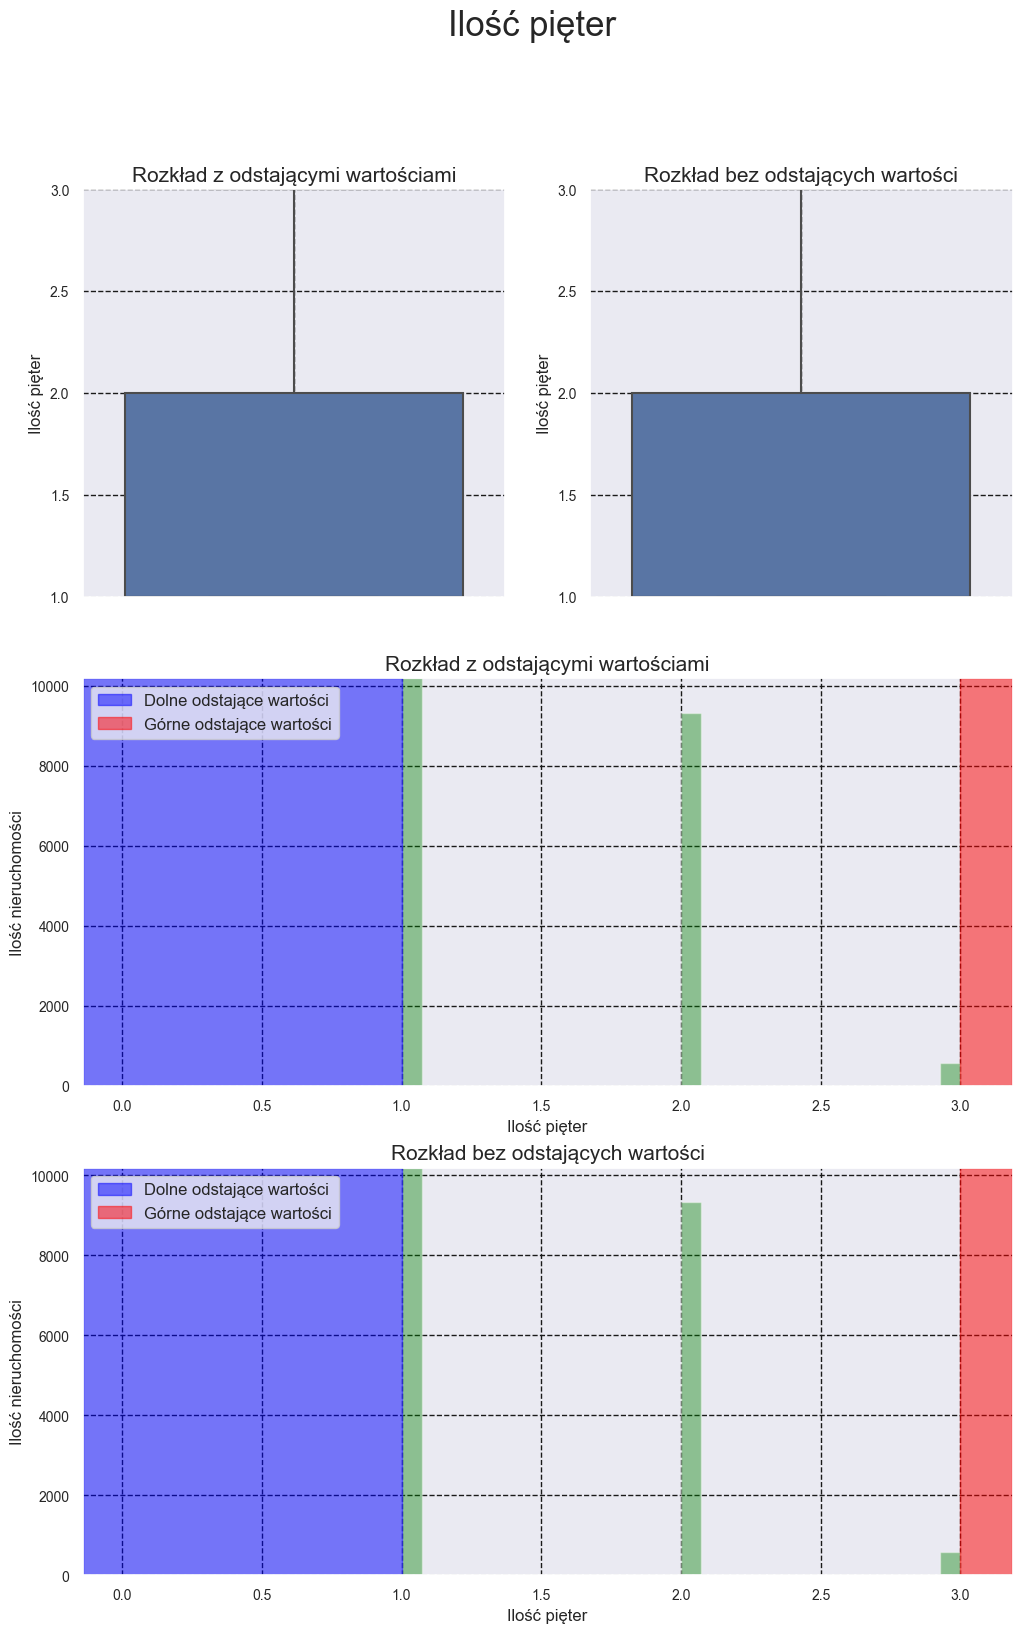

In [17]:
title = 'Ilość pięter'
labels_box = ('Ilość pięter', None)
labels_dist = ('Ilość nieruchomości', 'Ilość pięter')
column = 'floors'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.7 Powierzchnia piwnicy

Dolna granica: -88.86984799449905
Górna granica: 139.7326008718081


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00,19920.00
mean,493707.66,3.32,1.99,182.32,828.11,1.53,0.00,0.18,3.41,7.55,24.18,47.56,-122.22,178.38,819.61,41.68
std,248127.95,0.86,0.68,69.84,684.81,0.56,0.06,0.66,0.65,1.06,35.99,0.14,0.14,57.77,877.63,29.07
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,37.07,60.48,0.00
25%,315000.00,3.00,2.00,130.06,464.51,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,135.64,464.51,16.00
50%,438000.00,3.00,2.00,171.87,682.83,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.25,167.22,689.80,38.00
75%,612996.25,4.00,2.00,225.75,917.32,2.00,0.00,0.00,4.00,8.00,47.98,47.68,-122.14,210.89,891.86,61.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,139.35,47.78,-121.31,537.90,31149.11,115.00


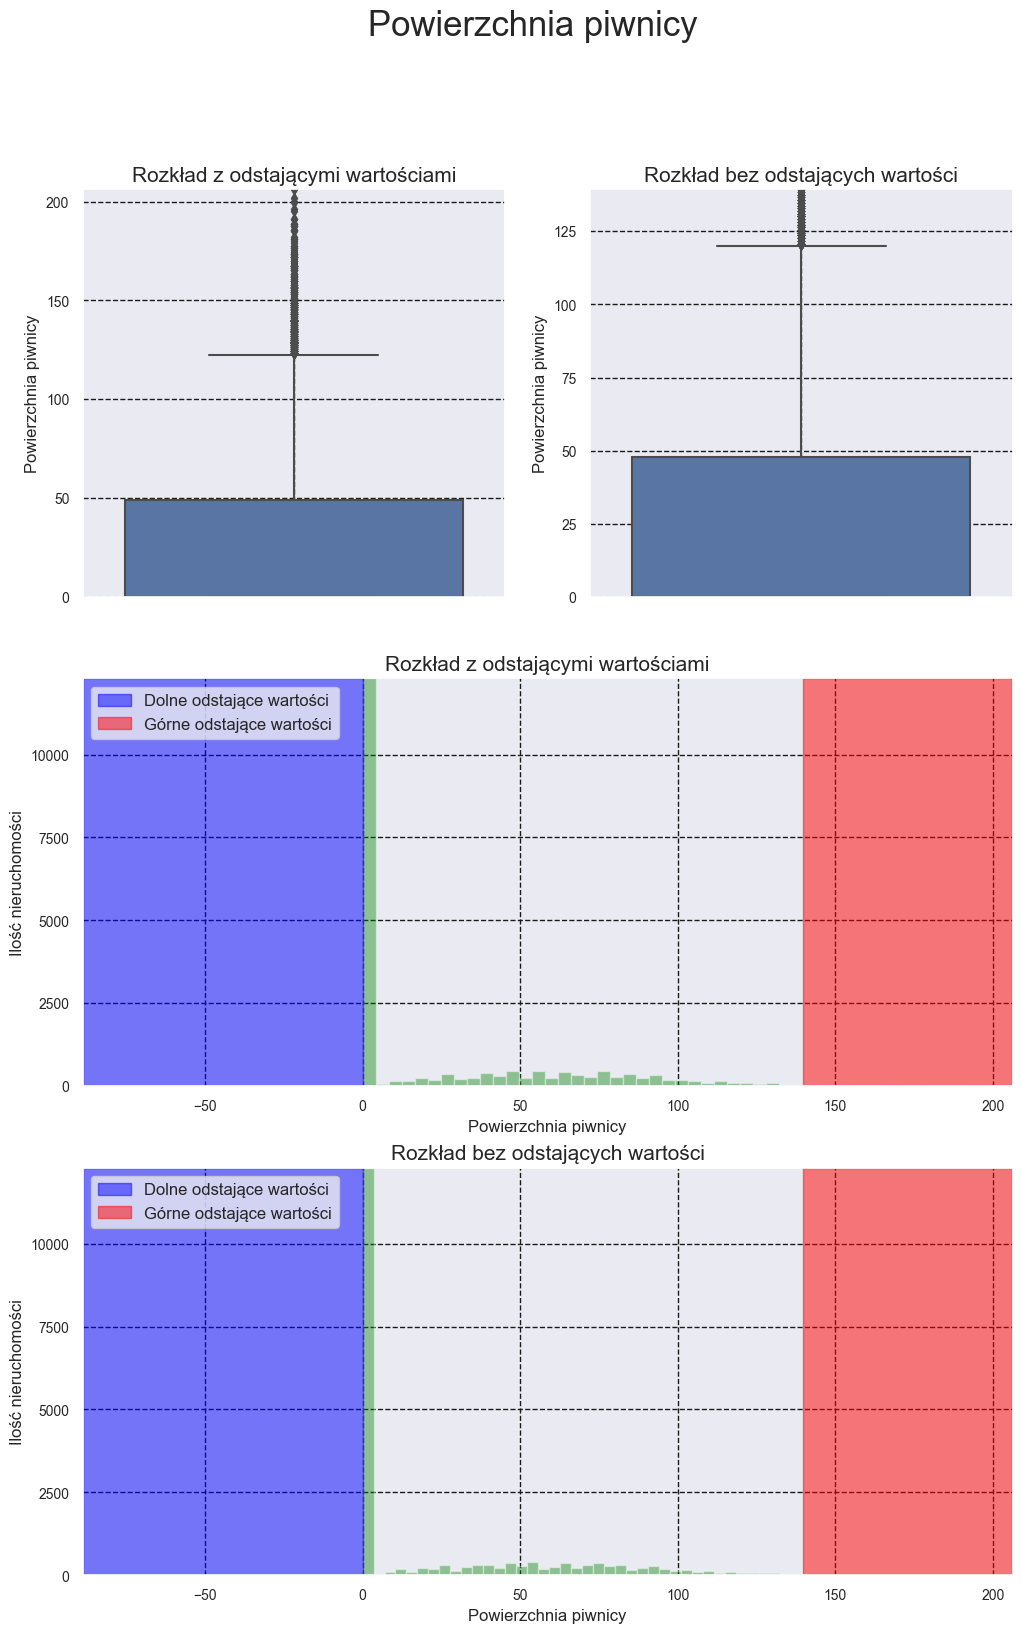

In [18]:
title = 'Powierzchnia piwnicy'
labels_box = ('Powierzchnia piwnicy', None)
labels_dist = ('Ilość nieruchomości', 'Powierzchnia piwnicy')
column = 'm2_basement'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.8 Powierzchnia mieszkalna piętnastu najbliższych nieruchomości

Dolna granica: 5.065230192015008
Górna granica: 351.69057414760294


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00,19736.00
mean,488662.44,3.32,1.98,180.72,821.90,1.52,0.00,0.18,3.41,7.53,24.15,47.56,-122.22,176.47,813.45,41.89
std,242575.58,0.86,0.67,68.00,678.96,0.56,0.06,0.66,0.65,1.03,35.90,0.14,0.14,54.48,874.21,29.08
min,75000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,37.07,60.48,0.00
25%,313100.00,3.00,2.00,129.13,464.51,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,135.64,464.51,16.00
50%,435000.00,3.00,2.00,170.94,680.04,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.25,166.30,687.66,38.00
75%,605000.00,4.00,2.00,223.89,911.28,2.00,0.00,0.00,4.00,8.00,47.38,47.68,-122.14,209.96,889.63,61.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,139.35,47.78,-121.31,351.17,31149.11,115.00


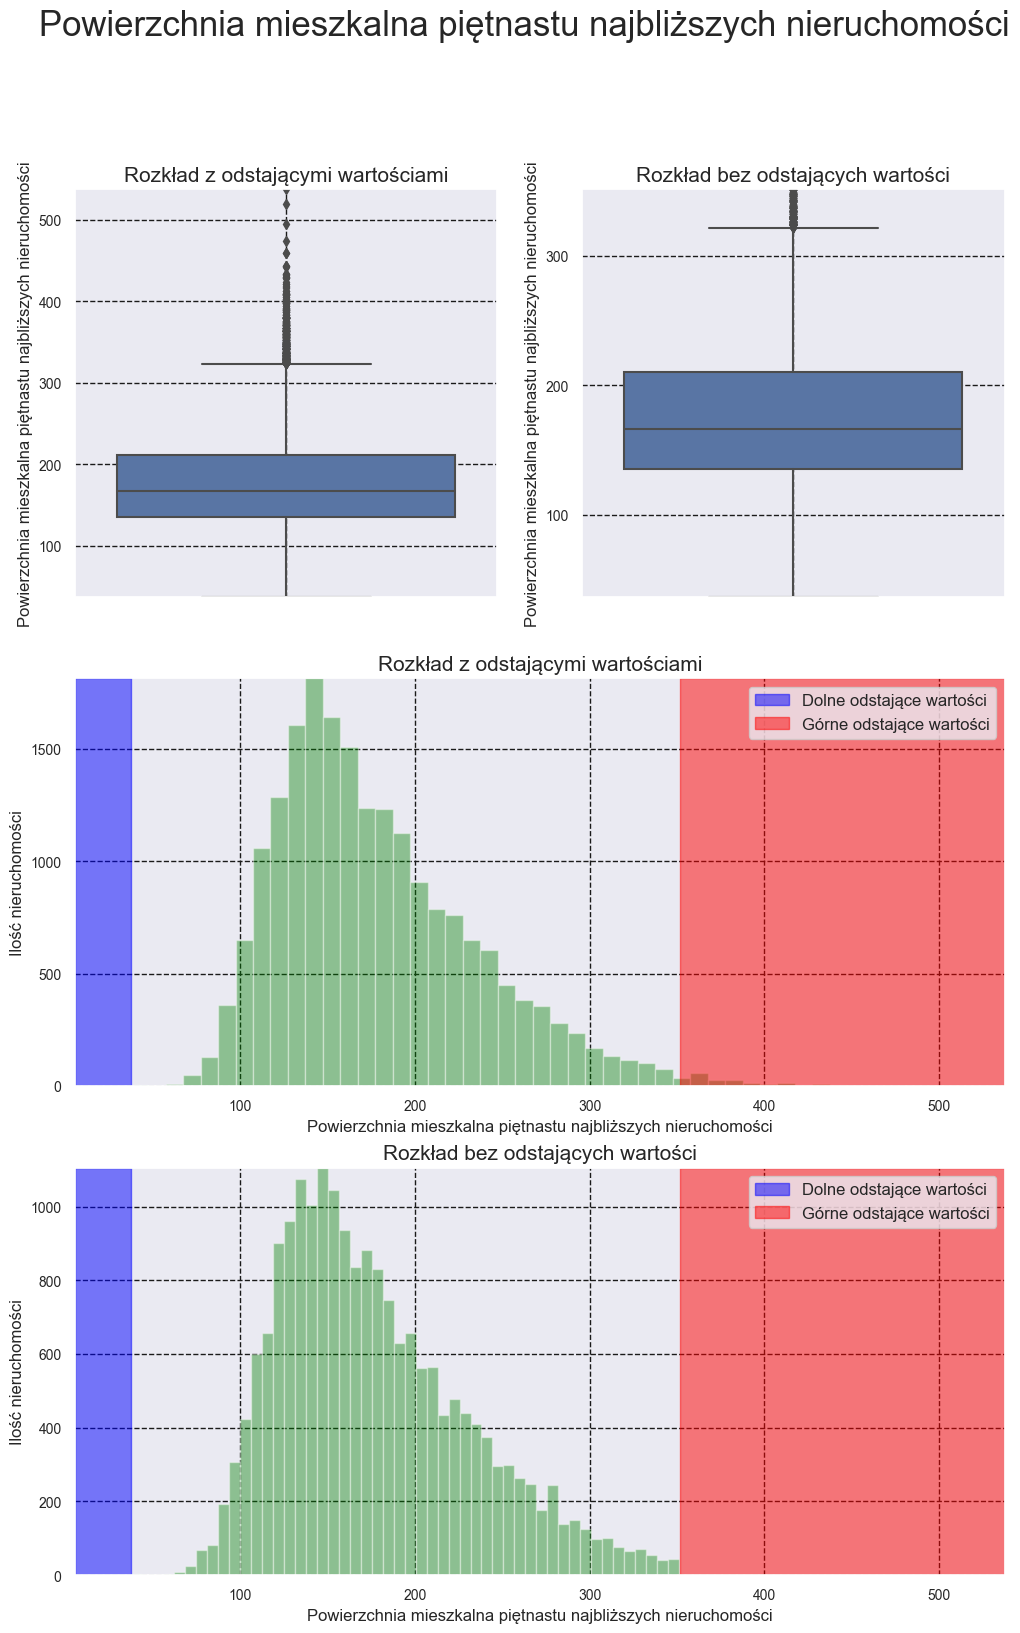

In [19]:
title = 'Powierzchnia mieszkalna piętnastu najbliższych nieruchomości'
labels_box = ('Powierzchnia mieszkalna piętnastu najbliższych nieruchomości', None)
labels_dist = ('Ilość nieruchomości', 'Powierzchnia mieszkalna piętnastu najbliższych nieruchomości')
column = 'm2_living15'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.9 Powierzchnia działki piętnastu najbliższych nieruchomości

Dolna granica: -1809.1116022176325
Górna granica: 3436.0168236036966


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00
mean,487832.27,3.31,1.98,180.05,775.40,1.52,0.00,0.18,3.41,7.52,24.21,47.56,-122.22,175.73,736.27,42.02
std,242940.67,0.86,0.67,67.69,572.44,0.56,0.06,0.65,0.65,1.02,35.87,0.14,0.13,54.13,474.09,29.22
min,78000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,42.74,60.48,0.00
25%,312000.00,3.00,2.00,129.13,462.47,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,135.64,464.51,16.00
50%,435000.00,3.00,2.00,170.01,674.47,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.26,165.37,682.83,38.00
75%,605000.00,4.00,2.00,222.97,898.64,2.00,0.00,0.00,4.00,8.00,48.31,47.68,-122.15,208.10,873.10,62.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,139.35,47.78,-121.31,351.17,3433.85,115.00


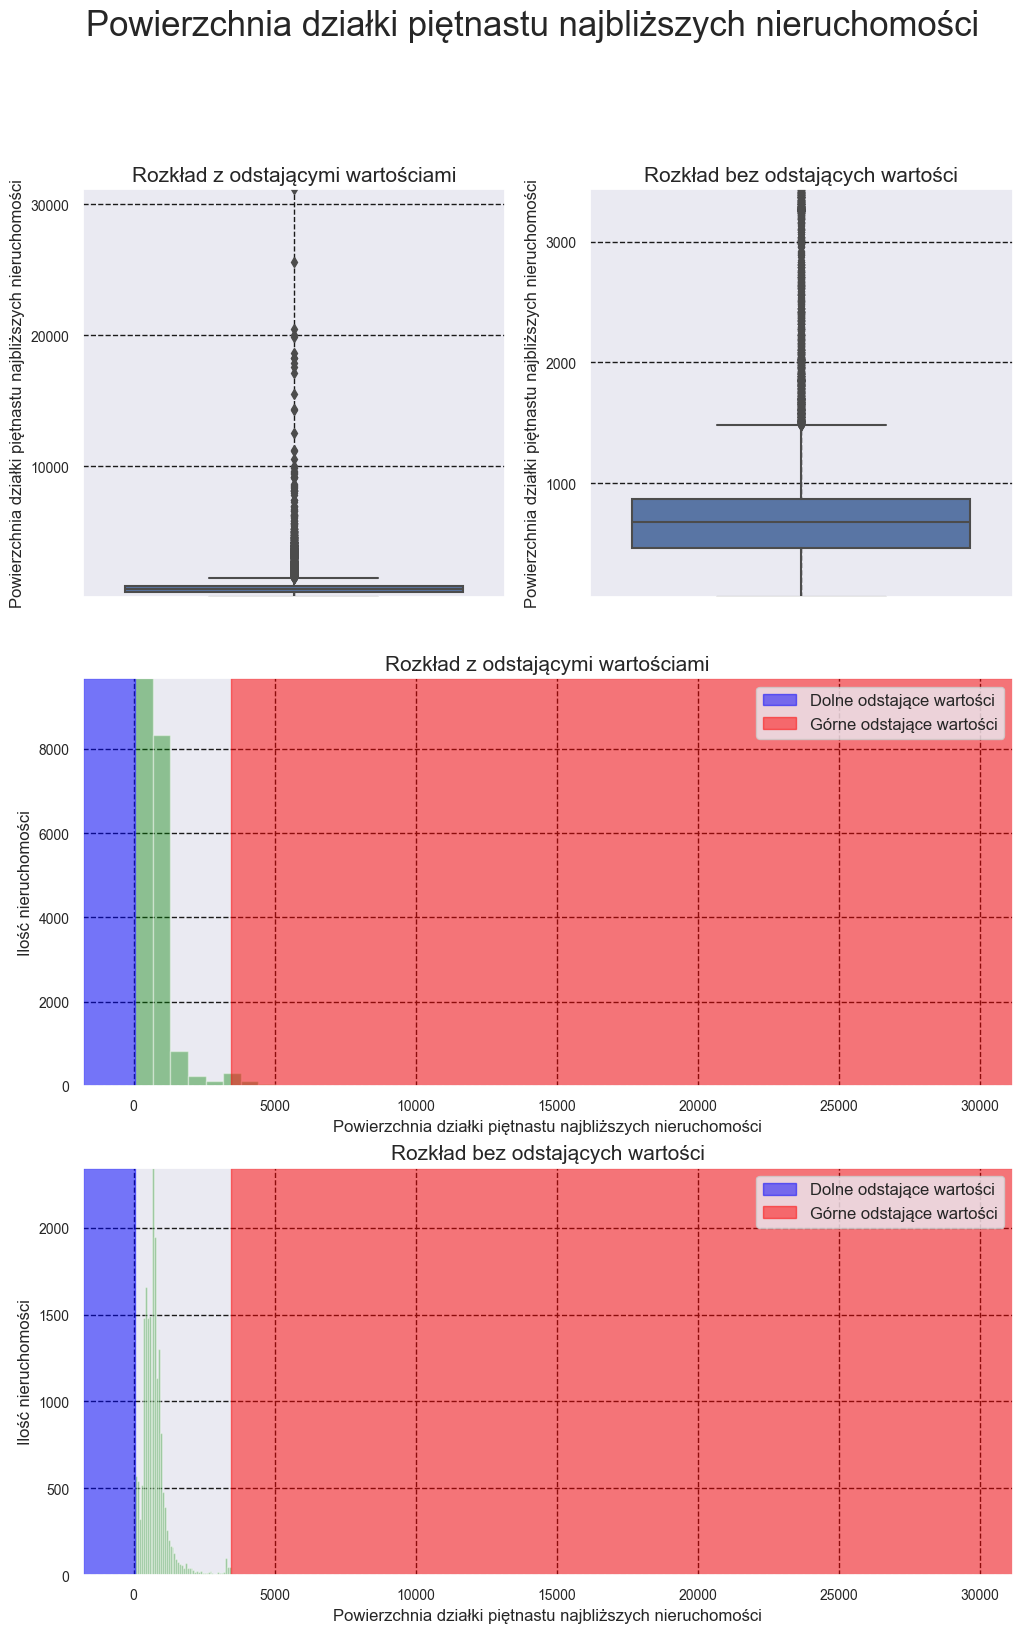

In [20]:
title = 'Powierzchnia działki piętnastu najbliższych nieruchomości'
labels_box = ('Powierzchnia działki piętnastu najbliższych nieruchomości', None)
labels_dist = ('Ilość nieruchomości', 'Powierzchnia działki piętnastu najbliższych nieruchomości')
column = 'm2_lot15'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

#### 2.2.4.10 Wiek nieruchomości

Dolna granica: -45.63239409118408
Górna granica: 129.68032976460296


,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00
mean,487832.27,3.31,1.98,180.05,775.40,1.52,0.00,0.18,3.41,7.52,24.21,47.56,-122.22,175.73,736.27,42.02
std,242940.67,0.86,0.67,67.69,572.44,0.56,0.06,0.65,0.65,1.02,35.87,0.14,0.13,54.13,474.09,29.22
min,78000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,42.74,60.48,0.00
25%,312000.00,3.00,2.00,129.13,462.47,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,135.64,464.51,16.00
50%,435000.00,3.00,2.00,170.01,674.47,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.26,165.37,682.83,38.00
75%,605000.00,4.00,2.00,222.97,898.64,2.00,0.00,0.00,4.00,8.00,48.31,47.68,-122.15,208.10,873.10,62.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,139.35,47.78,-121.31,351.17,3433.85,115.00


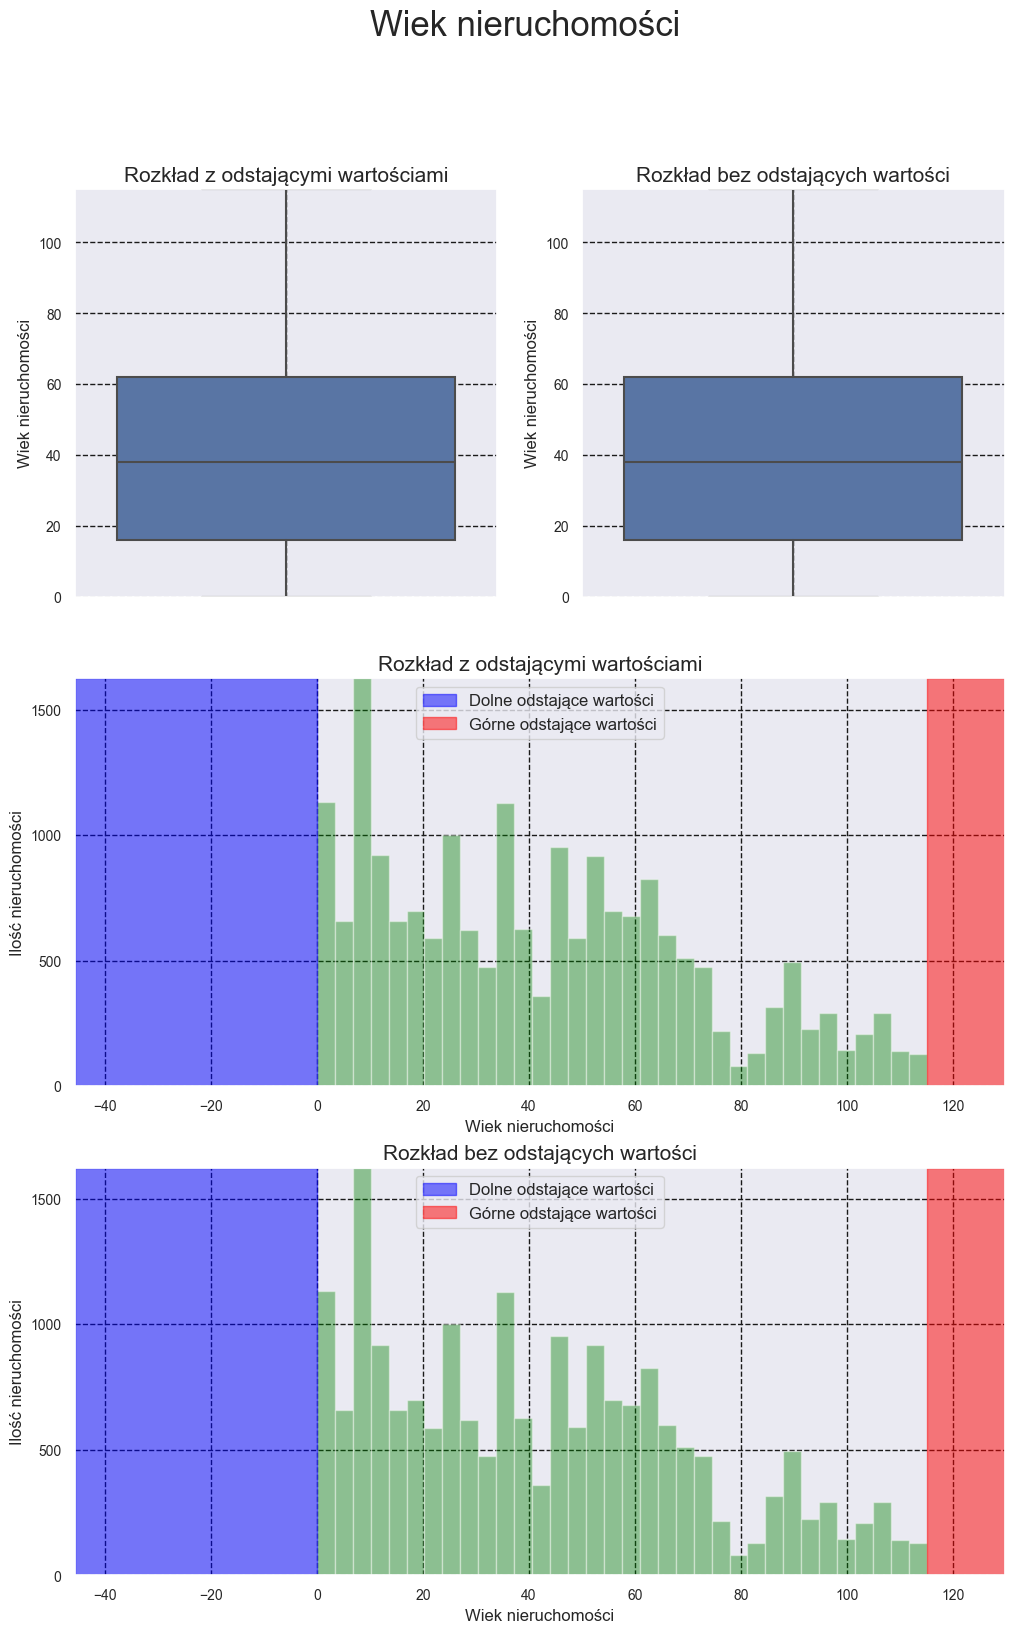

In [21]:
title = 'Wiek nieruchomości'
labels_box = ('Wiek nieruchomości', None)
labels_dist = ('Ilość nieruchomości', 'Wiek nieruchomości')
column = 'age'

analyze_and_remove_outliers(df=houses_df, col=column, labels_box=labels_box, labels_dist=labels_dist, method=method, title=title)
houses_df.describe()

In [22]:
houses_df.describe()

,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,lat,long,m2_living15,m2_lot15,age
count,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00,19401.00
mean,487832.27,3.31,1.98,180.05,775.40,1.52,0.00,0.18,3.41,7.52,24.21,47.56,-122.22,175.73,736.27,42.02
std,242940.67,0.86,0.67,67.69,572.44,0.56,0.06,0.65,0.65,1.02,35.87,0.14,0.13,54.13,474.09,29.22
min,78000.00,1.00,0.00,34.37,48.31,1.00,0.00,0.00,1.00,3.00,0.00,47.16,-122.51,42.74,60.48,0.00
25%,312000.00,3.00,2.00,129.13,462.47,1.00,0.00,0.00,3.00,7.00,0.00,47.47,-122.33,135.64,464.51,16.00
50%,435000.00,3.00,2.00,170.01,674.47,1.00,0.00,0.00,3.00,7.00,0.00,47.57,-122.26,165.37,682.83,38.00
75%,605000.00,4.00,2.00,222.97,898.64,2.00,0.00,0.00,4.00,8.00,48.31,47.68,-122.15,208.10,873.10,62.00
max,1640000.00,6.00,4.00,418.06,4618.08,3.00,1.00,4.00,5.00,12.00,139.35,47.78,-121.31,351.17,3433.85,115.00


### 2.2.5 Wizualizacja linii regresji dla poszczególnych cech

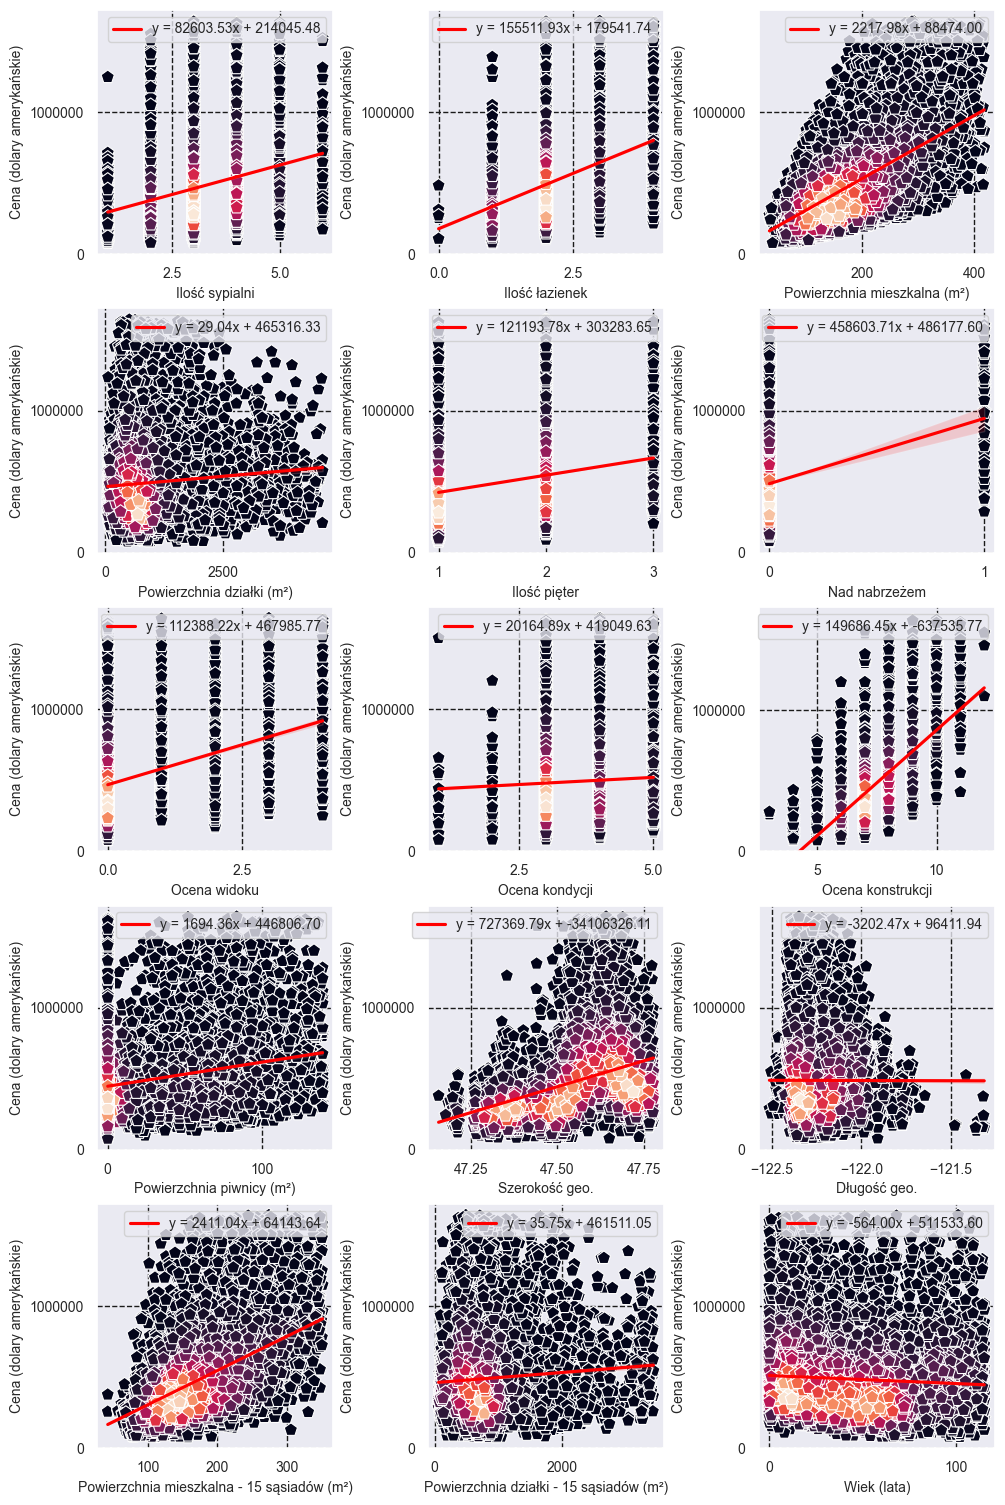

In [23]:
if method=='zscore':
    plot_correlations(houses_df, houses_df.shape[0], (10, 15), 10)
else:
    pass

# 3. Przygotowanie danych do trenowania modelu

## 3.1 Zakodowanie cechy kategorycznej zawierającej kod pocztowy (zipcode)

In [24]:
encoder = OneHotEncoder(sparse=False)

categorical = houses_df.select_dtypes('object')

encoder.fit(categorical)

category_values = encoder.transform(categorical)
category_names = encoder.get_feature_names_out(['zipcode'])

houses_df = pd.concat([
    houses_df.select_dtypes(exclude='object'),
    pd.DataFrame(category_values, columns=category_names).astype(int)],
    axis=1)

dump(encoder, 'saves/Encoder.model')

['saves/Encoder.model']

## 3.2 Podział zbioru danych na podzbiór treningowy oraz testowy

In [25]:
# Wydzielenie cech niezależnych
X = houses_df.drop(columns='price')

# Wydzielenie cechy zależnej
y = houses_df['price']

# Kolumny z kodem pocztowym.
zipcode_cols = [col for col in X.columns if col.startswith('zipcode_')]

# Podział na podzbiory
if method == 'zscore':
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=houses_df[zipcode_cols])
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [26]:
display(X_test)
display(y_test)

,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6928,5,2,180.23,318.65,2,0,0,4,6,66.89,...,0,0,0,0,0,0,0,0,0,0
13615,3,2,101.26,780.38,1,0,0,4,7,0.00,...,0,0,0,0,0,0,0,0,0,0
8154,2,1,115.20,752.51,2,0,2,3,7,0.00,...,0,0,0,0,0,0,0,0,0,0
11929,4,1,135.64,1545.71,1,0,0,4,6,0.00,...,0,0,0,0,0,0,0,0,0,0
5197,3,2,222.04,836.12,1,0,0,3,8,82.68,...,0,0,0,0,0,0,0,0,0,0
1105,3,2,111.48,1108.79,1,0,0,4,7,0.00,...,0,0,0,0,0,0,0,0,0,0
8341,4,2,254.55,456.34,1,0,0,4,8,127.28,...,0,0,0,0,0,0,0,0,0,1
7160,3,3,117.06,151.80,3,0,0,3,8,0.00,...,0,0,0,0,0,0,0,0,0,0
12604,2,1,72.46,383.87,1,0,0,3,7,0.00,...,0,0,0,0,0,0,0,0,0,0
6042,2,1,72.46,322.84,1,0,0,4,5,0.00,...,0,0,0,0,0,0,0,0,0,0


6928   565000.00
          ...   
Name: price, Length: 3881, dtype: float64

## 3.3 Standaryzacja cech ciągłych

In [27]:
# Nie standaryzujemy kodu pocztowego (zipcode). Ta wartość ta zostanie potraktowana jako kategoryczna oraz zakodowana. 
scaler = StandardScaler()

COLS_TO_STANDARIZE = ['bedrooms', 'bathrooms', 'm2_living',
                      'm2_lot', 'floors', 'view',
                      'condition', 'grade', 'm2_basement',
                      'lat', 'long', 'm2_living15',
                      'm2_lot15', 'age']

# Dopasowanie skalera do zbioru treningowego
scaler.fit(X_train[COLS_TO_STANDARIZE])

# Standaryzacja zbioru treningowego oraz testowego
X_train[COLS_TO_STANDARIZE] = scaler.transform(X_train[COLS_TO_STANDARIZE])
X_test[COLS_TO_STANDARIZE] = scaler.transform(X_test[COLS_TO_STANDARIZE])

# Sprawdzenie, czy dane zostały prawidłowo zestandaryzowane, a więc 
# czy średnia wartość wszystkich cech ciągłych jest równa 0 w zbiorze treningowym i bliska 0 w zbiorze testowym.
X_train.describe()
X_test.describe()

dump(scaler, 'saves/Scaler.model')

['saves/Scaler.model']

## 3.4 Transformacja ramki do postaci macierzy CSR.

In [28]:
from scipy.sparse import csr_matrix

X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)

# 4. Trenowanie modeli oraz analiza ich jakości

In [29]:
# Zdefinowanie ramki danych zawierających informacje o metrykach modeli
results = pd.DataFrame(columns=["Średni błąd absolutny", "Średni błąd kwadratowy", "Współczynnik determinacji R2"])

# Zdefiniowanie podziału zbioru treningowego na pięć części. W każdej z pięci iteracji model będzie uczył się
# na podstawie czterech podzbiorów i korzystał z piątego w celu porównania, przez co zostanie lepiej dopasowany.
k_fold = KFold(n_splits=5, shuffle=True)

## 4.1 Pojedyncze modele

### 4.1.1 Regresja liniowa (model: LinearRegression)

In [30]:
parameters = {}

linear = LinearRegression()
lr = GridSearchCV(linear, parameters, n_jobs=4, cv=k_fold)

lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

lr_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["LinearRegression"])
results = results.append(lr_results)

### 4.1.2 Regresja liniowa z regularyzacją L2 (model: Ridge)

In [31]:
parameters = {'alpha': [0.5, 1.0, 1.5, 2.0] ,
              'fit_intercept': [True, False],
              'copy_X': [True], 
              'solver': ['auto']}

ridge = Ridge()
rg = GridSearchCV(ridge, parameters, n_jobs=4, cv=k_fold)

rg.fit(X_train, y_train)

predicted = rg.predict(X_test)

rg_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["Ridge"])
results = results.append(rg_results)

### 4.1.3 Regresja liniowa z regularyzacją L1 (model: Lasso)

In [32]:
parameters = {'alpha': [0.5, 1.0, 1.5, 2.0] ,
              'fit_intercept': [True, False],
              'copy_X': [True]}

lasso = Lasso()
ls = GridSearchCV(lasso, parameters, n_jobs=4, cv=k_fold)

ls.fit(X_train, y_train)

predicted = ls.predict(X_test)

ls_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["Lasso"])
results = results.append(ls_results)

### 4.1.4 Regresja liniowa za pomocą drzewa decyzyjnego (model: DecisionTreeRegressor)

In [33]:
parameters = {'max_depth': [5, 10, 15],
              'min_samples_split': [1, 2, 3], 
              'min_samples_leaf': [1, 2, 3]}

decision_tree_regressor = DecisionTreeRegressor()
dtr = GridSearchCV(decision_tree_regressor, parameters, n_jobs=4, cv=k_fold)

dtr.fit(X_train, y_train)

predicted = dtr.predict(X_test)

dtr_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["DecisionTreeRegressor"])
results = results.append(dtr_results)

## 4.2 Zespoły modeli

### 4.2.1 Regresja liniowa za pomocą lasu losowego (model: RandomForestRegressor)

In [34]:
parameters = {'n_estimators': [100],
              'max_depth': [5, 10, 15, 20, 30],
              'bootstrap': [True]}

random_forest_regressor = RandomForestRegressor()
rfr = GridSearchCV(random_forest_regressor, parameters, n_jobs=4, cv=k_fold)

rfr.fit(X_train, y_train)

predicted = rfr.predict(X_test)

rfr_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["RandomForestRegressor"])
results = results.append(rfr_results)

### 4.2.2 Regresja liniowa za pomocą wzmacniania gradientowego (model: GradientBoostingRegressor)

In [35]:
parameters = {'learning_rate': [0.1],
              'n_estimators': [100],
              'max_depth': [3, 5, 10, 15]}

gradient_boosting_regressor = GradientBoostingRegressor()
gbr = GridSearchCV(gradient_boosting_regressor, parameters, n_jobs=4, cv=k_fold)

gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)

gbr_results = pd.DataFrame([calculate_metrics(y_test, predicted)], index=["GradientBoostingRegressor"])
results = results.append(gbr_results)

## 4.3 Metryki modeli oraz ich porównanie

In [36]:
results.sort_values('Współczynnik determinacji R2', ascending=False)
dump(gbr, 'saves/GBR.model')

['saves/GBR.model']

## 5. Uruchomienie aplikacji do predykcji cen nieruchomości


In [37]:
Application().run()